In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset weatherHistory.csv

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

### Get rid of non-numerical columns of the dataset

In [3]:
df = df.select_dtypes(include=[np.number])
df.head()

Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   
1         9.355556                  7.227778      0.86            14.2646   
2         9.377778                  9.377778      0.89             3.9284   
3         8.288889                  5.944444      0.83            14.1036   
4         8.755556                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  
0                   251.0          15.8263         0.0               1015.13  
1                   259.0          15.8263         0.0               1015.63  
2                   204.0          14.9569         0.0               1015.94  
3                   269.0          15.8263         0.0               1016.41  
4                   259.0          15.8263         0.0               1016.51

### Use 'Temperature (C)' as your target variable. Plot the relationship of each of the numerical features with the target variable

Temperature (C)  Apparent Temperature (C)
Temperature (C)                  1.000000                  0.992629
Apparent Temperature (C)         0.992629                  1.000000

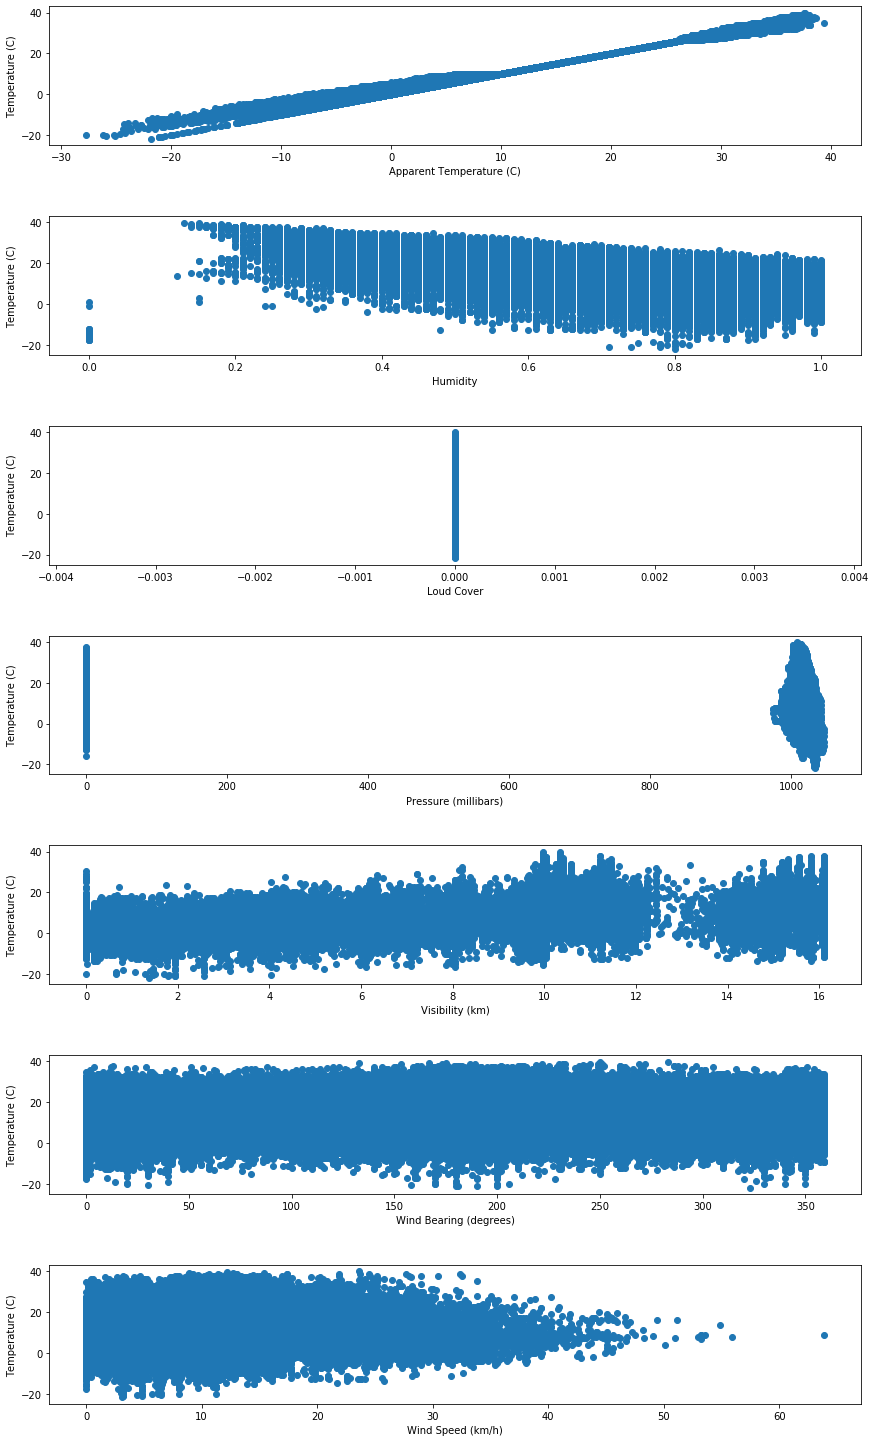

In [4]:
X_s = df.columns.difference(['Temperature (C)'])
Y_s = 'Temperature (C)'
fig, axis = plt.subplots(7,1,figsize=[12,20])
fig.tight_layout(h_pad=5)
for i,j in enumerate(X_s):
    axis[i].set_xlabel(j)
    axis[i].set_ylabel(Y_s)
    axis[i].scatter(df[j],df[Y_s])

df[['Temperature (C)','Apparent Temperature (C)']].corr()   

### Leave only one feature that has a linear relationship with the target variable.

In [5]:
df1 = df[["Temperature (C)","Humidity"]]
df1.head()

Temperature (C)  Humidity
0         9.472222      0.89
1         9.355556      0.86
2         9.377778      0.89
3         8.288889      0.83
4         8.755556      0.83

### Divide the dataset into training and test sets with the ratio 80:20.

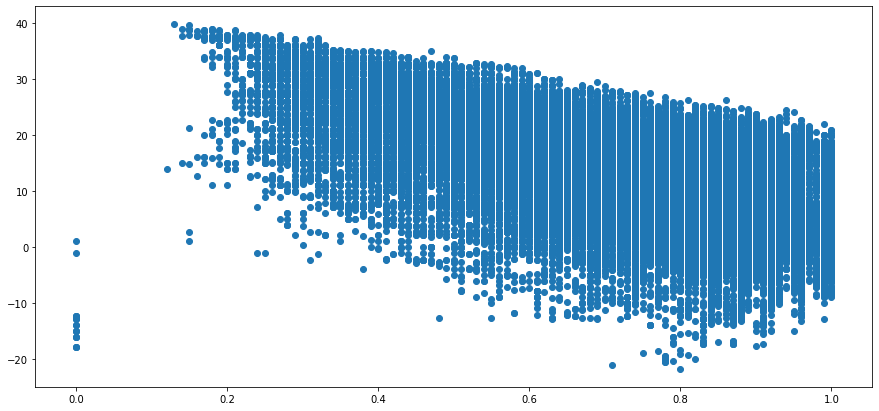

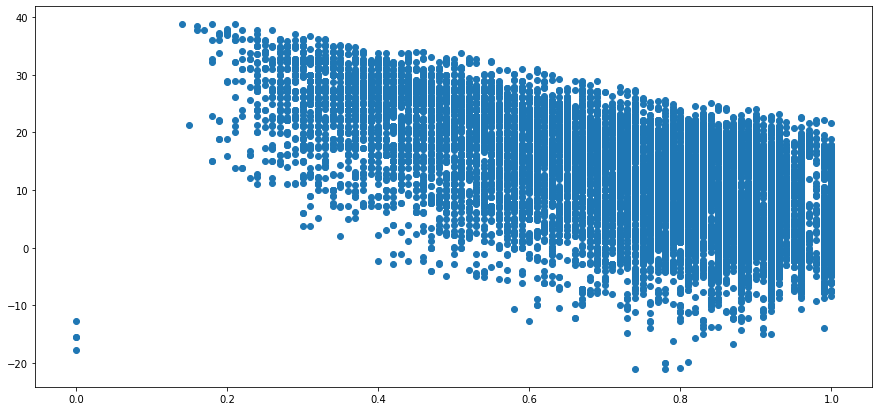

In [116]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(df1[df1.columns.difference(["Temperature (C)"])],df1["Temperature (C)"],test_size=0.2,random_state=20)

plt.figure(figsize=(15,7))
plt.scatter(xtrain,ytrain)


plt.figure(figsize=(15,7))
plt.scatter(xtest,ytest)

### Implement a function fit_ridge_regression

In [117]:
def fit_ridge_regression(data_vector1, response_vector,l=1):
    data_vector = data_vector1.copy()
    data_vector["for_intercept"] = 1
    data_vector= data_vector[[data_vector.columns[1],data_vector.columns[0]]]
    beta = np.dot(np.dot(np.linalg.inv(np.dot(data_vector.T,data_vector) + l*np.identity(len(np.dot(data_vector.T,data_vector)))),data_vector.T),response_vector)
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :param l: ridge variable
    :return: numpy array beta of coefficients of the regression
    """
    
    #TODO
    
    return beta
beta = fit_ridge_regression(xtrain,ytrain,2)


Humidity
77990      0.71
75938      0.92
30055      0.65
42135      0.78
84280      0.93
...         ...
31962      0.79
88988      0.67
23775      0.53
37135      0.93
92634      0.78

[77162 rows x 1 columns]

### Implement a function fit_polynomial_regression

In [122]:
def fit_polynomial_regression(data_vector1, response_vector, degree=2):
    data_vector = data_vector1.copy()
    for i in range(0,degree+1):
        data_vector[data_vector.columns[0]+"_x**"+str(i)] = data_vector[data_vector.columns[0]]**i
        
    data_vector = data_vector.drop(data_vector.columns[0],axis=1)
    
    beta_pol = np.dot(np.dot(np.linalg.inv(np.dot(data_vector.T,data_vector)),data_vector.T),response_vector)
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    
    #TODO
    
    return beta_pol
beta_pol = fit_polynomial_regression(xtrain, ytrain)


### Use the resulting train and test sets with the previous 2 functions to fit ridge regression and polynomial regression lines.

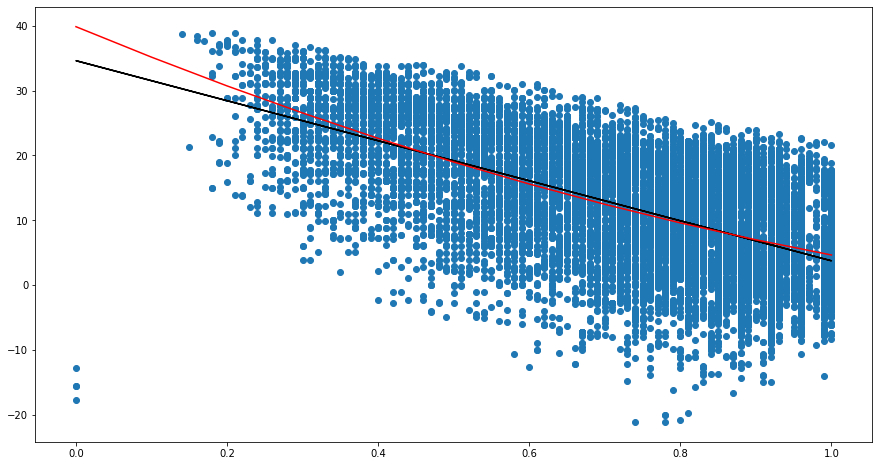

In [123]:
plt.figure(figsize=(15,8))
plt.scatter(xtest,ytest)
plt.plot(xtest,beta[0]+beta[1]*xtest,color='k')
plt.plot(np.arange(0,1.1,0.1),[sum(beta_pol[i]*x**i for i in range(len(beta_pol))) for x in np.arange(0,1.1,0.1)],color="r")

plt.show()


### Calculate RMSE (root mean squared error) for ridge and polynomial regressions

In [124]:
from sklearn.metrics import mean_squared_error
print('RMSE for ridge_regression is %.3f' % np.sqrt(mean_squared_error(ytest,beta[0]+beta[1]*xtest)))
print('RMSE for polynomiale_regression is %.3f' % np.sqrt(mean_squared_error(ytest,sum(beta_pol[i]*xtest**i for i in range(len(beta_pol))))))

RMSE for ridge_regression is 7.406
RMSE for polynomiale_regression is 7.389


### Now fit the ridge and polynomial regressions to your data using sklearn and compare the results with your own fit_1d_linear_regression function. Use RMSE for comparison.

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

#Polynomial regression
degree = 2
poly_features = PolynomialFeatures(degree=degree)
xtrain_poly = poly_features.fit_transform(np.array(xtrain).reshape(-1, 1))
xtest_poly = poly_features.fit_transform(np.array(xtest).reshape(-1, 1))

regr_poly = LinearRegression()
regr_poly.fit(xtrain_poly,ytrain)
pred_poly = regr_poly.predict(xtest_poly)
print(regr_poly.intercept_,regr_poly.coef_)
print()
print('RMSE for polynomial_regression is %.3f' % np.sqrt(mean_squared_error(ytest,pred_poly)))


39.87142576911951 [  0.         -48.29698564  13.0770477 ]

RMSE for polynomial_regression is 7.389


In [130]:
from sklearn.linear_model import Ridge

ridge_regr = Ridge(alpha=1)
ridge_regr.fit(xtrain,ytrain)
ridge_pred = ridge_regr.predict(xtest)
print(ridge_regr.intercept_,ridge_regr.coef_)
print()
print('RMSE for ridge_regression is %.3f' % np.sqrt(mean_squared_error(ytest,pred_poly)))

34.64810450051594 [-30.89857312]

RMSE for ridge_regression is 7.389


### Use any additional visualizations that may help during your analysis.

In [127]:
df.corr()['Temperature (C)']

Temperature (C)             1.000000
Apparent Temperature (C)    0.992629
Humidity                   -0.632255
Wind Speed (km/h)           0.008957
Wind Bearing (degrees)      0.029988
Visibility (km)             0.392847
Loud Cover                       NaN
Pressure (millibars)       -0.005447
Name: Temperature (C), dtype: float64

In [128]:
df.corr()

Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.992629 -0.632255   
Apparent Temperature (C)         0.992629                  1.000000 -0.602571   
Humidity                        -0.632255                 -0.602571  1.000000   
Wind Speed (km/h)                0.008957                 -0.056650 -0.224951   
Wind Bearing (degrees)           0.029988                  0.029031  0.000735   
Visibility (km)                  0.392847                  0.381718 -0.369173   
Loud Cover                            NaN                       NaN       NaN   
Pressure (millibars)            -0.005447                 -0.000219  0.005454   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.008957                0.029988   
Apparent Temperature (C)          -0.056650                0.029031   
Humidity                          -0.224951                0.000735   
Wind Speed (km/h)                  1.000000                0.103822   
Wind Bearing (degrees)             0.103822                1.000000   
Visibility (km)                    0.100749                0.047594   
Loud Cover                              NaN                     NaN   
Pressure (millibars)              -0.049263               -0.011651   

                          Visibility (km)  Loud Cover  Pressure (millibars)  
Temperature (C)                  0.392847         NaN             -0.005447  
Apparent Temperature (C)         0.381718         NaN             -0.000219  
Humidity                        -0.369173         NaN              0.005454  
Wind Speed (km/h)                0.100749         NaN             -0.049263  
Wind Bearing (degrees)           0.047594         NaN             -0.011651  
Visibility (km)                  1.000000         NaN              0.059818  
Loud Cover                            NaN         NaN                   NaN  
Pressure (millibars)             0.059818         NaN              1.000000